# The Central Limit Theorem

Recall that the $z$-statistic is defined as,

$$
z = \frac{x - \mu}{\sigma}
$$

where $\mu$ is the population mean and $\sigma$ is the population standard deviation and $x$ is normally distributed.

As we noted above, we are usually not interested in a specific value, $x$, but rather a sample mean, $\overline{x}$. So, can we substitute $x$ for $\overline{x}$ and use the $z$-table to test our null hypothesis? Almost...There are a few things we need to address first:
- How do we know if $\overline{x}$ is normally distributed?
- Does the underlying population of $\overline{x}$ have the same mean and standard deviation as $x$?

Fortunately, we have a theorem for this: **The Central Limit Theorem**

```{admonition} The Central Limit Theorem
:class: note
Given a sample of size $N$ drawn from a distribution with known population mean $\mu$ and known population standard deviation, $\sigma$, if the size ($N$) of the sample is sufficiently large, then the distribution of the sample means will approximate a normal distribution regardless of the underlying distribution of the population. The mean of the sample means will equal the population mean, $\mu$, and the standard deviation of the distribution of the sample means will equal the standard error, $\sigma/\sqrt{N}$.
```

In other words, the Central Limit Theorem (CLT) says that if you have a sample that is large enough, you can use the normally distributed $z$-statistic to estimate probabilities of getting that sample mean - no matter the distribution of the underlying data.

Let's take a look at a demonstration of the CLT in action in python to convince ourselves that the CLT is valid.

## Demonstration of the CLT

In [1]:
# Load packages
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16) #set default font size and weight for plots
from scipy import stats

First, we need some data to work with. We are going to draw samples of data from three different distributions, a normal distribution, a uniform distribution and a lognormal distribution. Each sample is of size $N_0$.

In [2]:
N0 = 10000000
xinc = np.arange(-10,10,.01) # bin size

# We are drawing large samples from a normal, a uniform and a log-normal distribution.

xn = np.random.normal(0,1,size = (N0,))
xu = np.random.uniform(-5.,5.,size=(N0,))
xl = np.random.lognormal(0.,2.,size=(N0,))

Let's compute the histograms and plot the PDFs of each of these data sets to see what they look like.

In [3]:
# Calculate histograms

hn = np.histogram(xn,xinc)
hu = np.histogram(xu,xinc)
hl = np.histogram(xl,xinc)

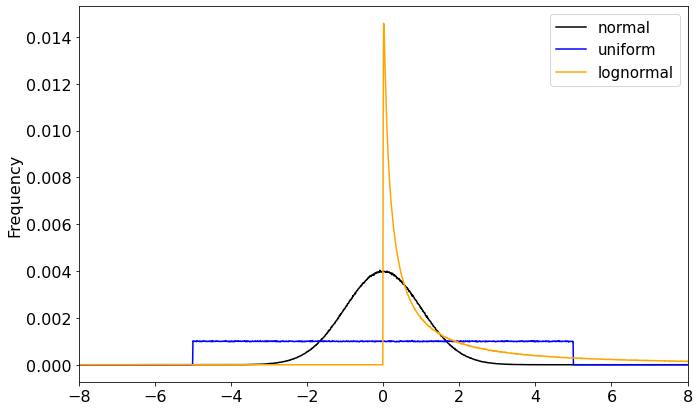

In [4]:
# Plot the PDFs (in terms of frequency)

plt.figure(figsize=(10,6))
plt.ylabel('Frequency')
plt.xlim(-8,8)

# Plot normal distribution
plt.plot(hn[1][:-1],hn[0]/N0,'-',color='black', label = 'normal')

# Plot uniform distribution
plt.plot(hu[1][:-1],hu[0]/N0,'-',color='blue',label = 'uniform')

# Plot log-normal distribution
plt.plot(hl[1][:-1],hl[0]/N0,'-',color='orange', label='lognormal')

# Add a legened
plt.legend(fontsize = 15)
plt.tight_layout()

For our demonstration of the CLT, let's start with the normal distribution.

What we are going to do is sample the normal distribution with different sample sizes, compute the mean for each sample, store it and repeat 10,000 times. We will then plot the distribution of these sample means and see what it looks like.

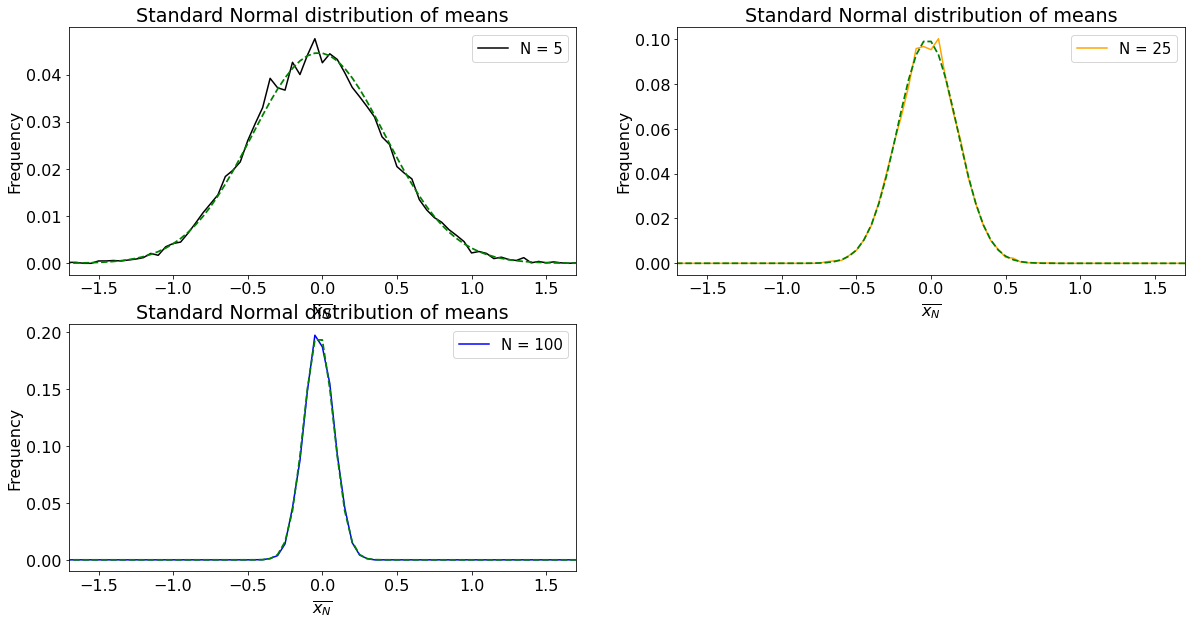

In [5]:
# Demonstration of the CLT using the normal distribution

bin_width = .05  # for histogram calculation
j = 1 # This is simply the subplot number
plt.figure(figsize = (20,10))

# Loop over three different sample sizes N = 5, 25 and 100
for N in (5, 25, 100):  

    samples = [] # initialize an empty list

    # set colours for plotting
    if(N == 5):
        clr = 'black'
    elif(N == 25):
        clr = 'orange'
    elif(N == 100):
        clr = 'blue'

    # Using a loop, draw a sample of N values from the normal distribution 10,000 times
    for i in np.arange(0,10000):
        samples.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))

    # calculate histograms
    bins = np.arange(-8,8,bin_width)
    samples_hist, x = np.histogram(samples,bins = bins)
    x = bins[0:-1]
    
    # Plot distribution of samples
    plt.subplot(2,2,j)
    plt.plot(x,samples_hist/len(samples), color = clr, label = 'N = ' + str(N))
    # Plot true normal distribution using stats.norm.pdf()
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, scale = 1./np.sqrt(N)), color = 'green', linestyle = '--', linewidth = 1.75)
    j += 1

    # Make the plot look nice!
    plt.xticks(np.arange(-10,10,2))
    plt.xticks(np.arange(-2,2,.5))
    plt.xlim(-1.7,1.7)
    plt.xlabel(r'$\overline{x_N}$')
    plt.ylabel('Frequency')
    plt.legend(fontsize = 15)
    plt.title('Standard Normal distribution of means')

What happens as $N$ increases? 

The distribution of sample means converges to a normal distribution! 

What else do you notice? 
- The population mean of $\overline{x_N}$ is the same as $x$. 
- The width of the distributions shrink, i.e. the standard deviation of $\overline{x_N}$ is $\sigma/N$, also known as the **standard error**.

This was a bit of an easy test given that we were drawing samples from a normal distribution. Does the CLT still work when samples are drawn from non-normal distributions? It should. Let's see.

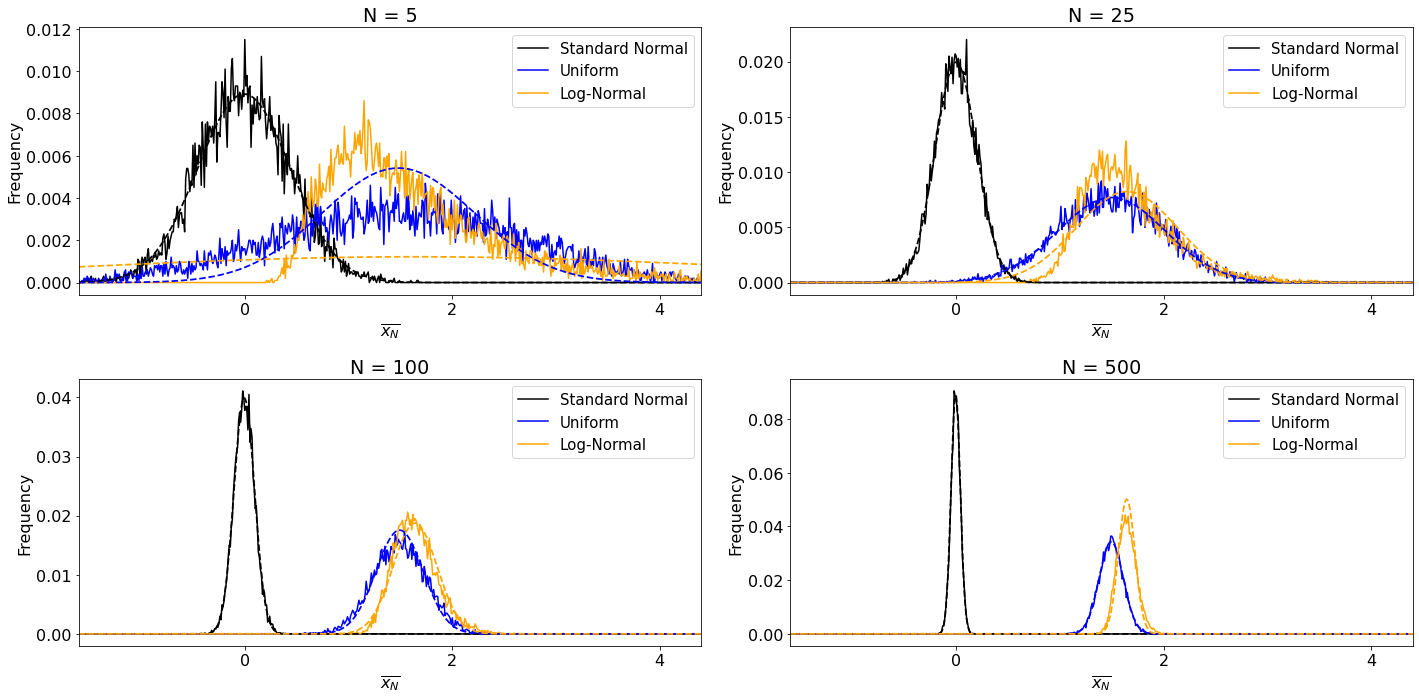

In [6]:
# Demonstration of the CLT using the normal, uniform and log-normal distributions
bin_width = .01
k = 1
plt.figure(figsize=(20,10))

# Loop over four different sample sizes N = 5, 25, 100 and 500
for N in (5, 25, 100, 500):

    y1, y2, y3 = [], [], [] # initialize three empty lists

    # Using a loop, draw a sample of N values from three distributions 10,000 times
    for i in np.arange(0,10000):
        y1.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))
        y2.append(np.mean(np.random.uniform(low = -3, high = 6, size = N)))
        y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))
        
    sigma_y2 = np.std(np.random.uniform(low = -3, high = 6, size = N))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
    
    # calculate histograms
    bins = np.arange(-8,8,bin_width)
    y1hist, x = np.histogram(y1,bins = bins)
    y2hist, x = np.histogram(y2,bins = bins)
    y3hist, x = np.histogram(y3,bins = bins)

    x = bins[0:-1]
    
    # Plot distributions of sample means
    plt.subplot(2,2,k)
    plt.plot(x,y1hist/len(y1), color = 'black', label = 'Standard Normal')
    plt.plot(x,y2hist/len(y2),  color = 'blue', label = 'Uniform')
    plt.plot(x,y3hist/len(y3), color = 'orange', label = 'Log-Normal')
    plt.tight_layout()
    k += 1

    # Plot true normal distributions for given mean and standard deviation
    if (N >= 0):
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y1), scale = 1./np.sqrt(N)), 
                 color = 'black', linestyle = '--', linewidth = 1.75)
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y2), scale = sigma_y2/np.sqrt(N)), 
                 color = 'blue', linestyle = '--', linewidth = 1.75)
        plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), 
                 color = 'orange', linestyle = '--', linewidth = 1.75)

    #  Make the plot look nice!
    plt.legend(loc = 'upper right',fontsize = 15)
    plt.xticks(np.arange(-10,10,2))
    plt.xlim(-1.6,4.4)
    plt.xlabel(r'$\overline{x_N}$')
    plt.ylabel('Frequency')
    plt.title('N = ' + str(N))
    plt.legend(fontsize = 15)

We have now convinced ourselves of the validity of the CLT with this simple demonstration. But you may be asking yourself, how big does our sample size $N$ have to be for the CLT to apply, i.e., how large is "sufficiently large"? In practice, $N$ $\geq$ 30 is considered large enough. You can test this yourself by changing the values of $N$ above.

Now, let's look at how we can estimate statistical significance using the $z$-statistic.